In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
cifar10 = tf.keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
print("train.shape:",train_images.shape, train_labels.shape)
print("test.shape: ",test_images.shape, test_labels.shape)

train.shape: (50000, 32, 32, 3) (50000, 1)
test.shape:  (10000, 32, 32, 3) (10000, 1)


In [5]:
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

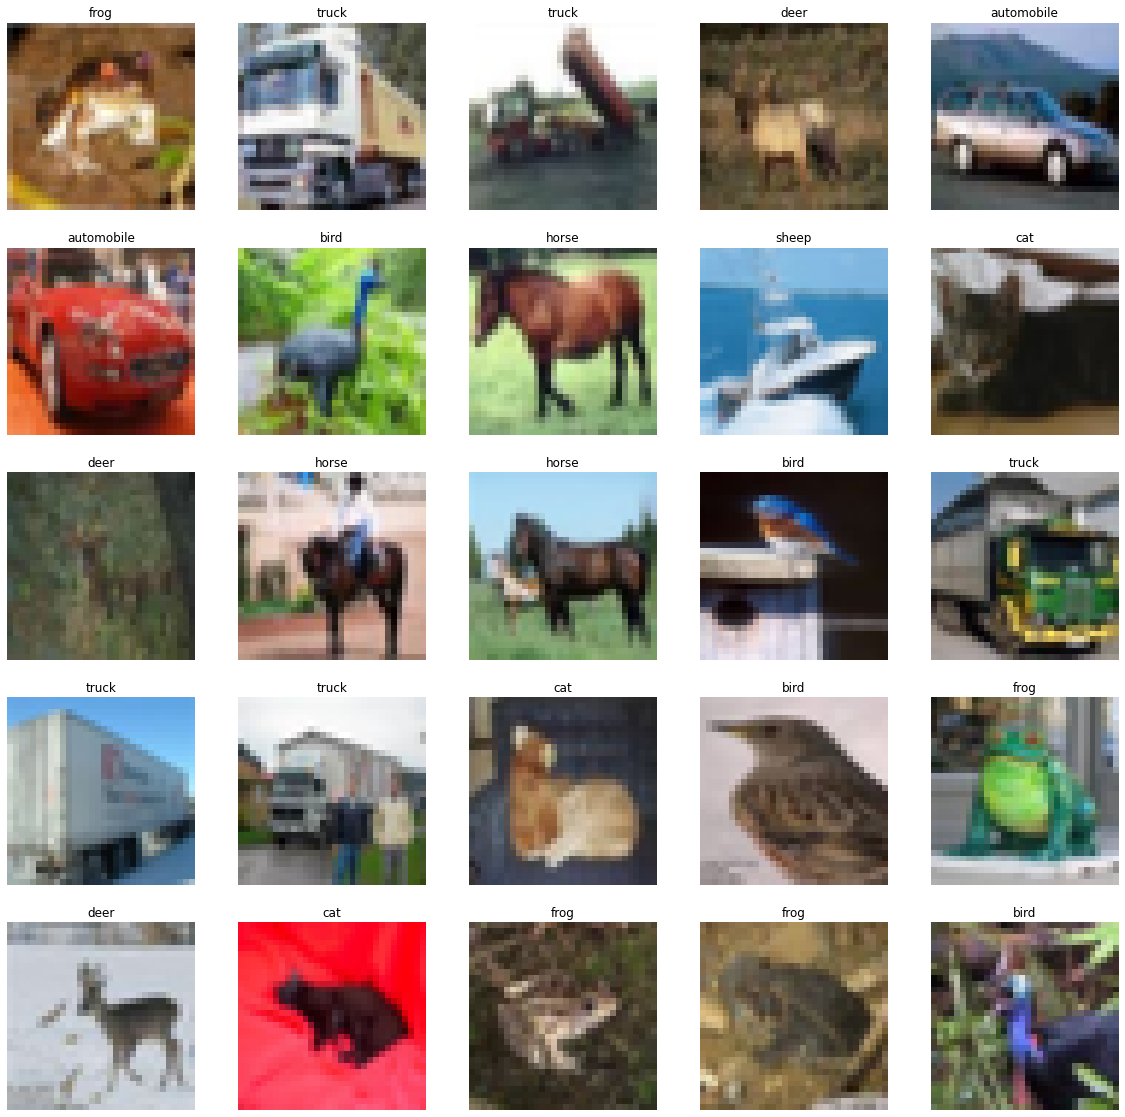

In [6]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(25)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')
    #print(image.numpy().shape)

In [7]:
#plt.imshow(train_images[67])
#print(train_labels[67])

In [8]:
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [9]:
#print(train_images)

In [10]:
input_shape = (32, 32, 3)

train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 3)
train_images = train_images / 255.0
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 3)
test_images = test_images / 255.0

In [11]:
print("train.shape:",train_images.shape, train_labels.shape)
print("test.shape: ",test_images.shape, test_labels.shape)

train.shape: (50000, 32, 32, 3) (50000,)
test.shape:  (10000, 32, 32, 3) (10000,)


In [12]:
#print(train_images)

In [13]:
train_labels = tf.one_hot(train_labels.astype(np.int32), depth=10)
test_labels = tf.one_hot(test_labels.astype(np.int32), depth=10)

In [14]:
#plt.imshow(train_images[67])
#print(train_labels[67])

In [15]:
batch_size = 32
num_classes = 10
epochs = 50

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [17]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

In [18]:
history = model.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8011 - acc: 0.3383
Epoch 2/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4883 - acc: 0.4593
Epoch 3/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3532 - acc: 0.5171
Epoch 4/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2474 - acc: 0.5574
Epoch 5/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1708 - acc: 0.5864
Epoch 6/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1088 - acc: 0.6087
Epoch 7/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0593 - acc: 0.6279
Epoch 8/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0147 - acc: 0.6452
Epoch 9/50
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9746 - acc: 0.6587
Epoch 10/50
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9394 - acc: 0.6717
Epoch 11/

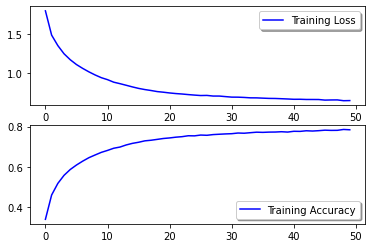

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.6544 - acc: 0.7836


In [22]:
# Predict the values from the validation dataset
pred_labels = model.predict(test_images)
# Convert predictions classes to one hot vectors 
pred_classes = np.argmax(pred_labels,axis = 1) 
# Convert validation observations to one hot vectors
true_labels = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(true_labels, pred_classes)

[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'sheep'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'sheep'),
  Text(0, 9.5, 'truck')]]

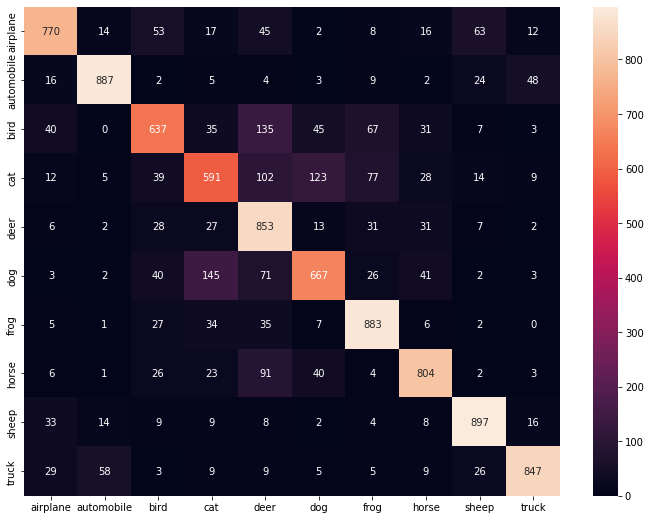

In [24]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)